Import nessecory packages

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


import data set 

In [60]:
mc=pd.read_csv("mcdonalds.csv")

In [61]:
mc.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [62]:
mc.shape

(1453, 15)

Exploratory data analyst

In [63]:
mc.describe(include='all')

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453.000000,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,NaN,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,NaN,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,NaN,439,788
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.604955,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.221178,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,NaN


In [64]:
mc.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [65]:
mc.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1448    False
1449    False
1450    False
1451    False
1452    False
Length: 1453, dtype: bool

In [66]:
seg_var=mc.iloc[:,:11]   # segment variables 
seg_var

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No


In [67]:
# Convert "Yes" to 1 and other values to 0

numeric = (seg_var == "Yes").astype(int)


In [68]:
numeric

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [69]:
numeric_val= mc.iloc[:, :11].values
numeric_val = (numeric_val == "Yes").astype(int)

 Perform PCA

In [70]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(numeric)

# Extract PCA results
SD = np.round(np.sqrt(pca.explained_variance_),4)
PV = np.round(pca.explained_variance_ratio_,4)
CV = PV.cumsum()

index=[]
for i in range(len(SD)):
    i=i+1
    index.append("PC{}".format(i))

sum=pd.DataFrame({
    "Standard deviation":SD,"Proportion of Variance":PV,"Cumulative Proportion":PV.cumsum()
},index=index)
sum

,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.7570,0.2994,0.2994
PC2,0.6075,0.1928,0.4922
PC3,0.5046,0.1330,0.6252
PC4,0.3988,0.0831,0.7083
PC5,0.3374,0.0595,0.7678
PC6,0.3103,0.0503,0.8181
PC7,0.2897,0.0438,0.8619
PC8,0.2751,0.0395,0.9014
PC9,0.2653,0.0368,0.9382
PC10,0.2488,0.0324,0.9706


In [73]:
# Encode categorical columns
label_encoders = {}
for column in mc.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    mc[column] = le.fit_transform(mc[column])
    label_encoders[column] = le

# Standardize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(mc)

# Fit K-Means model
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
kmeans.fit(data_scaled)

# Get cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Evaluate model
silhouette_avg = silhouette_score(data_scaled, labels)
print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.132


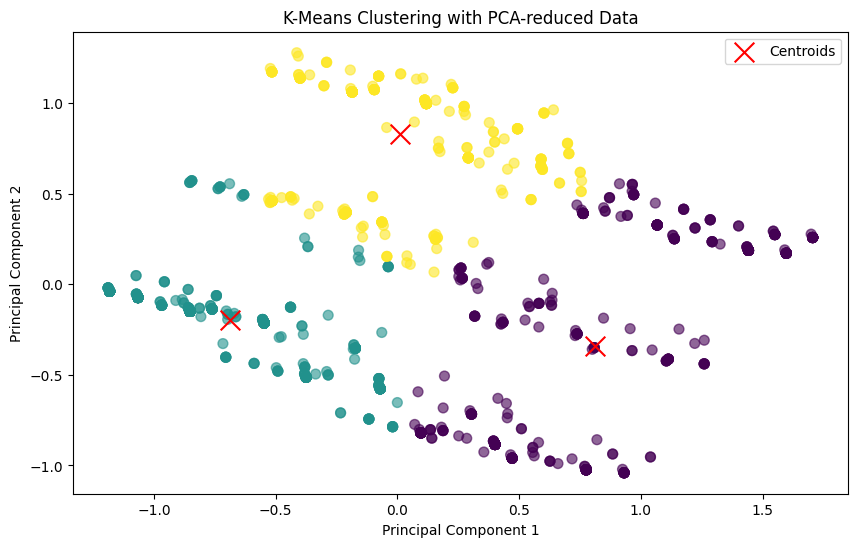

In [74]:

pca = PCA(n_components=2)
data_pca = pca.fit_transform(numeric)

# Fit k-means again on PCA-reduced data
kmeans_pca = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
kmeans_pca.fit(data_pca)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_pca.labels_, cmap='viridis', s=50, alpha=0.6)
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], 
            s=200, c='red', marker='x', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA-reduced Data')
plt.legend()
plt.show()


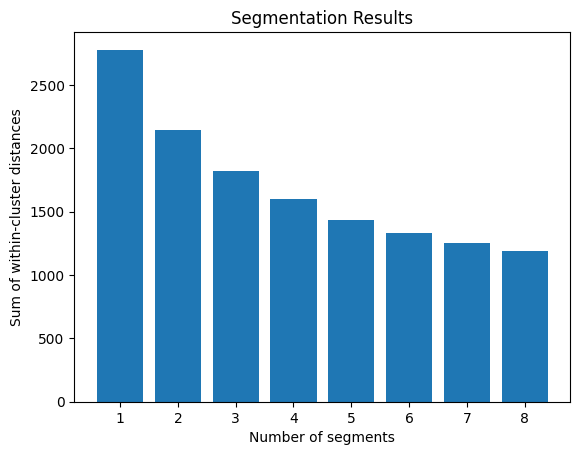

In [76]:

np.random.seed(1234)

nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(numeric)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km28[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()

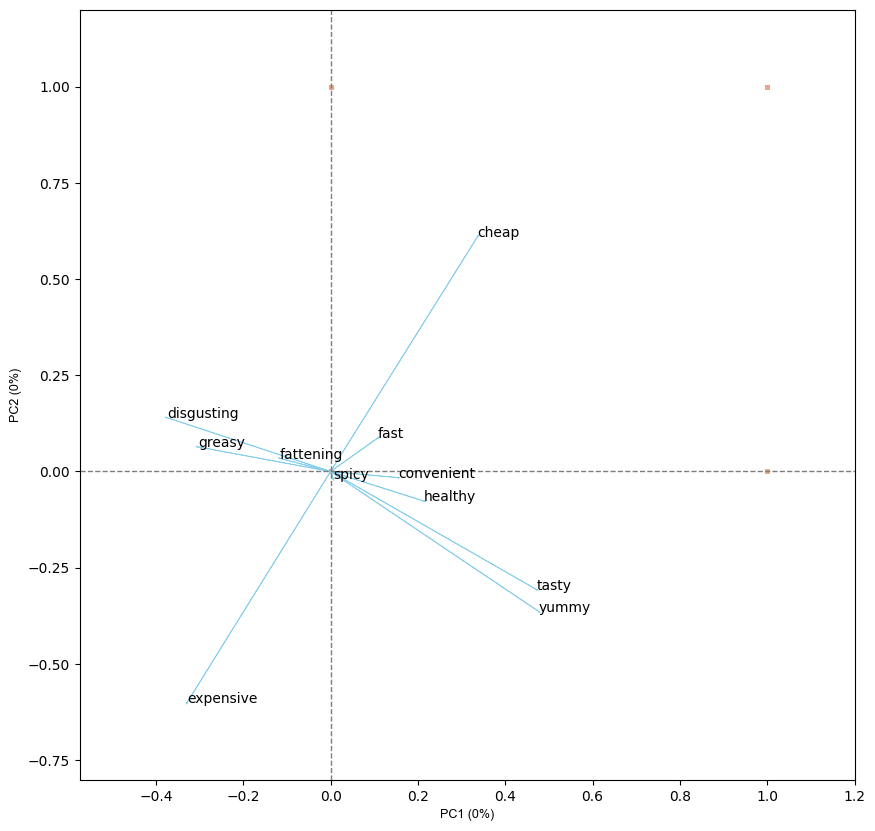

In [58]:
from bioinfokit.visuz import cluster 
cluster.biplot(cscore=numeric_val, loadings=-rotation_matrix, labels=mc.columns.values,var1=0,var2=0, show=True, dim=(10, 10))

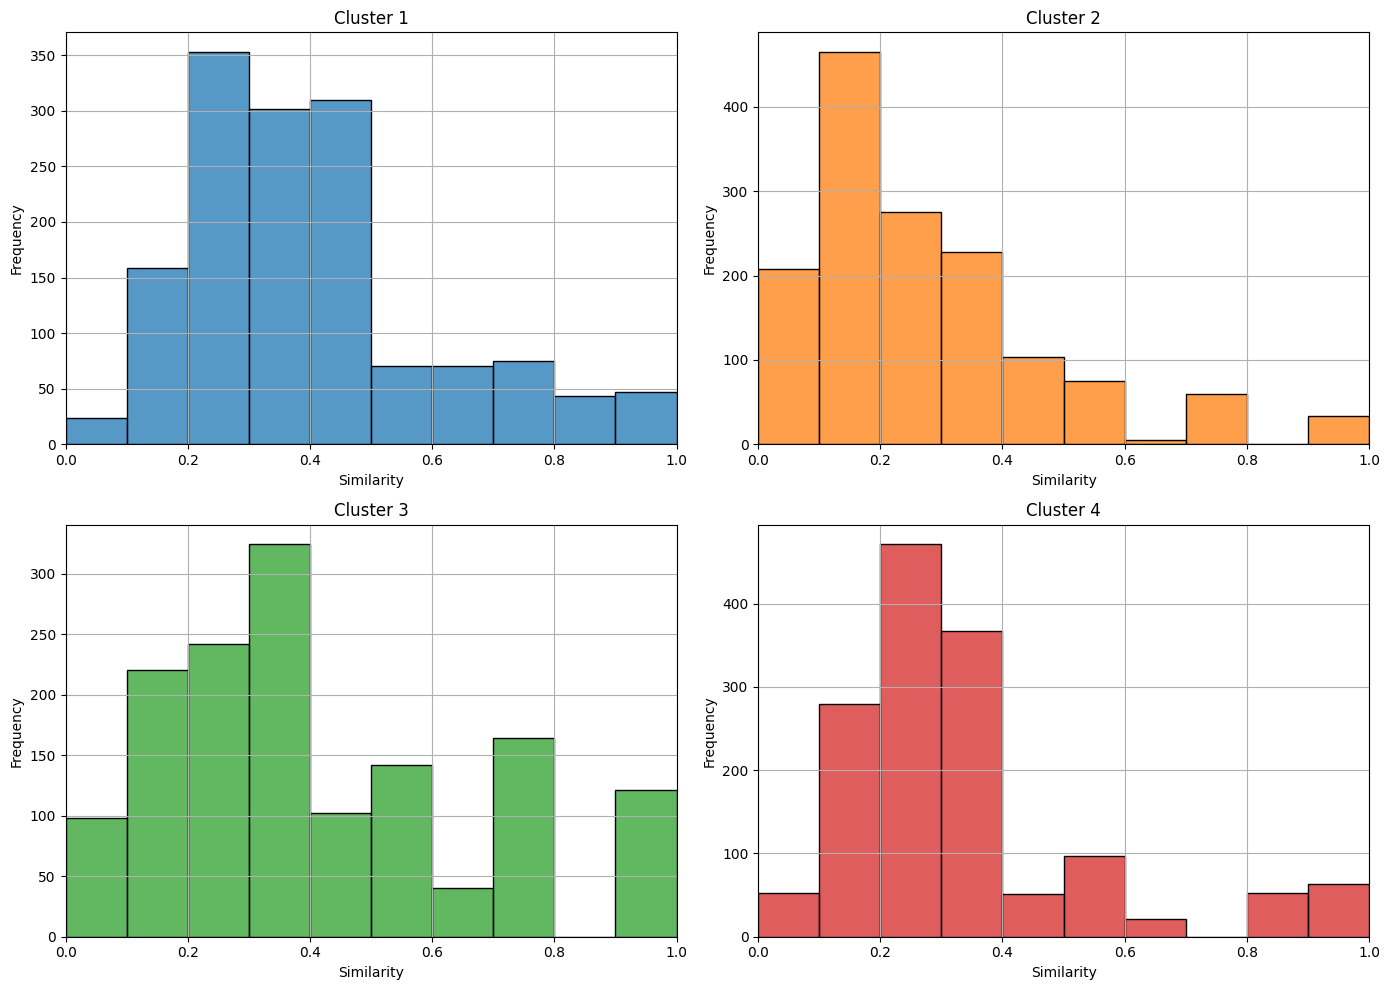

In [72]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


# Perform K-means clustering for 4 clusters
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans.fit(numeric)
labels = kmeans.labels_

# Calculate the distances to the cluster centers
distances = kmeans.transform(numeric)

# Convert distances to probabilities (scaled to 0-1 range)
scaler = MinMaxScaler()
probabilities = scaler.fit_transform(1 / (1 + distances))

# Plot individual histograms for each cluster's membership probability
plt.figure(figsize=(14, 10))

for i in range(4):
    plt.subplot(2, 2, i + 1)
    sns.histplot(probabilities[:, i], kde=False, bins=10, color=plt.cm.tab10(i))
    plt.xlim(0, 1)
    plt.xlabel('Similarity')
    plt.ylabel('Frequency')
    plt.title(f'Cluster {i + 1}')
    plt.grid(True)

plt.tight_layout()
plt.show()